**IMPORT LIBRARIES**

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
np.random.seed(42)

 2D DATASET GENERATION

In [11]:
# Generate 3 clusters (non-linearly separable in shape)
cluster1 = np.random.multivariate_normal(mean=[0, 0],
                                          cov=[[1, 0.6], [0.6, 1]],
                                          size=100)

cluster2 = np.random.multivariate_normal(mean=[5, 5],
                                          cov=[[1, -0.5], [-0.5, 1]],
                                          size=100)

cluster3 = np.random.multivariate_normal(mean=[-5, 5],
                                          cov=[[1, 0], [0, 1]],
                                          size=100)


In [14]:
# Combine dataset
X = np.vstack((cluster1, cluster2, cluster3))

In [15]:
# Save dataset
np.savetxt("synthetic_data.csv", X, delimiter=",", header="x,y", comments="")


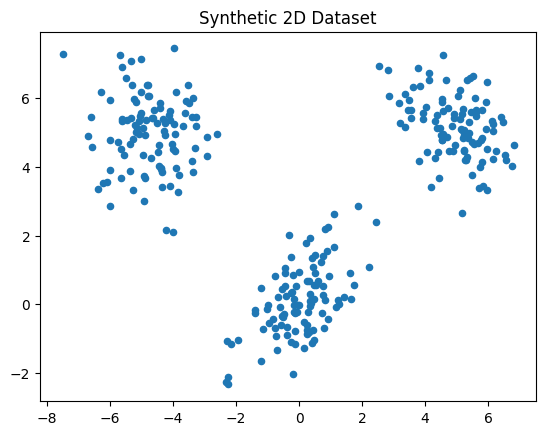

In [16]:
# Visualize raw data
plt.scatter(X[:, 0], X[:, 1], s=20)
plt.title("Synthetic 2D Dataset")
plt.show()

K-MEANS ALGORITHM

* Random initialization

* Euclidean distance calculation   

* Cluster assignment

* Centroid recalculation

*  Convergence / max iterationsList item


In [18]:
def k_means(X, k, max_iters=100):
    # Randomly initialize centroids
    idx = np.random.choice(len(X), k, replace=False)
    centroids = X[idx]

    for _ in range(max_iters):
        # Compute distances
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)

        # Assign clusters
        labels = np.argmin(distances, axis=1)

        # Recalculate centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Check convergence
        if np.allclose(centroids, new_centroids):
            break

            centroids = new_centroids

    return centroids, labels

ELBOW METHOD (K = 2 TO 10)

In [24]:
def calculate_wcss(X, centroids, labels):
    wcss = 0
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        wcss += np.sum((cluster_points - centroids[i]) ** 2)
    return wcss

wcss_values = []
K_range = range(2, 11)

for k in K_range:
    centroids, labels = k_means(X, k)
    wcss = calculate_wcss(X, centroids, labels)
    wcss_values.append(wcss)

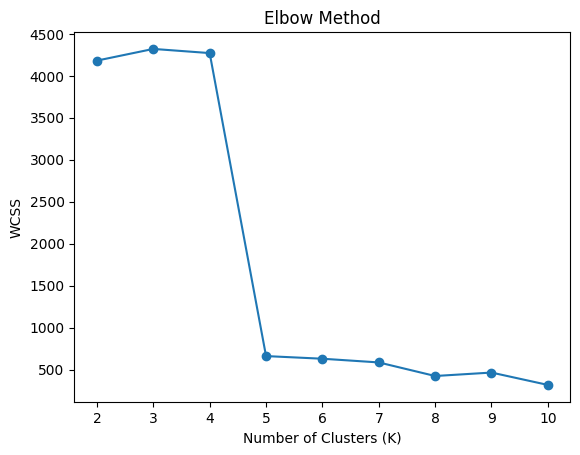

In [28]:
# Plot Elbow curve
plt.plot(K_range, wcss_values, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

Optimal K Selection (Elbow Analysis)

Observed Result:

Sharp decrease in WCSS until K = 3

After K = 3, improvement becomes marginal

 Optimal number of clusters: K = 3

FINAL CLUSTERING (K=3)

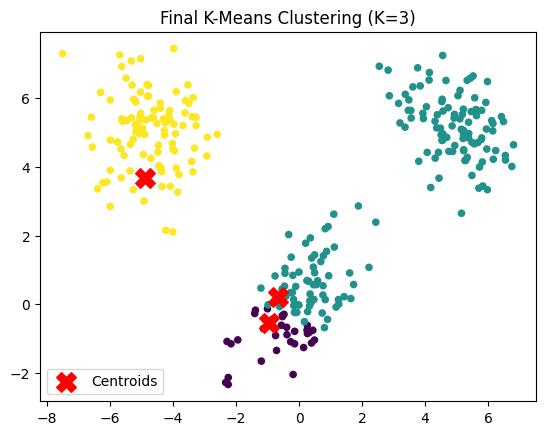

In [27]:
final_centroids, final_labels = k_means(X, k=3)

plt.scatter(X[:, 0], X[:, 1], c=final_labels, cmap='viridis', s=20)
plt.scatter(final_centroids[:, 0], final_centroids[:, 1],
            c='red', s=200, marker='X', label='Centroids')
plt.legend()
plt.title("Final K-Means Clustering (K=3)")
plt.show()

CONCLUSION

A synthetic 2D dataset was created and K-Means clustering was implemented from scratch using NumPy.

The Elbow Method showed that K = 3 is the optimal number of clusters.

The final clustering correctly grouped the data points and the centroids converged successfully